# Inicio - importação dos Datasets

Projeto feito para treinamento de algoritimo de Machine Learnig não supervisionado para clusterização de pessoas com risco de colesterol, onde utilizei diversas técnica como exclusão de dados ausentes e Substituição de valores em alguns campos faltantes

Ao realizar uma analise entre idade e colesterol, não foi possivel encontrar resultados consistentes.

O algoritimo utilizado foi o K-Means

Como resultado tivemos as seguintes informações.
 1 - Quanto maior o peso, maior o risco de ter colesterol.

 2 - O estado do Sergipe de acordo com os dados, é onde se encontra as pessoas no maior grupo de risco.

 

In [ ]:
import pandas as pd

In [ ]:
estados = pd.read_csv('estados_brasileiros.csv', sep=';', encoding='latin-1')

In [ ]:
estados.head()


,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


In [ ]:
clientes = pd.read_excel('dados_clientes.xlsx')
clientes.head

<bound method NDFrame.head of      id_cliente   peso  colesterol     genero  id_estado
0             1  102.0         111  Masculino         23
1             2  115.0         135  Masculino          7
2             3  115.0         136  Masculino          4
3             4  140.0         167   Feminino         24
4             5  130.0         158  Masculino         26
..          ...    ...         ...        ...        ...
542         543  172.0         207  Masculino         22
543         544  129.0         157  Masculino          1
544         545  107.0         115  Masculino          6
545         546  117.0         147  Masculino         20
546         547  148.0         176  Masculino          8

[547 rows x 5 columns]>

In [ ]:
idade = pd.read_csv('idade_clientes.csv', sep=';', encoding='latin-1')
idade.head

<bound method NDFrame.head of      id_cliente  idade
0             1     17
1             2     28
2             3     62
3             4     55
4             5     44
..          ...    ...
542         543     20
543         544     66
544         545     36
545         546     57
546         547     61

[547 rows x 2 columns]>

Analisando as Variaveis

In [ ]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [ ]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [ ]:
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [ ]:
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [ ]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


In [ ]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

In [ ]:
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


In [ ]:
clientes.dropna(subset=['peso'],inplace=True) #Eliminando dados ausentes


In [ ]:
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

# Variaveis Categóricas

In [ ]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [ ]:
estados.count()

id_estado       27
estado          27
sigla_estado    27
pais            25
dtype: int64

In [ ]:
estados.count()

id_estado       27
estado          27
sigla_estado    27
pais            25
dtype: int64

In [ ]:
estados.pais.fillna('Brasil', inplace=True) #Substituindo dados ausentes

Distribuição dos Dados

In [ ]:
import matplotlib.pyplot as plt


array([[<Axes: title={'center': 'peso'}>]], dtype=object)

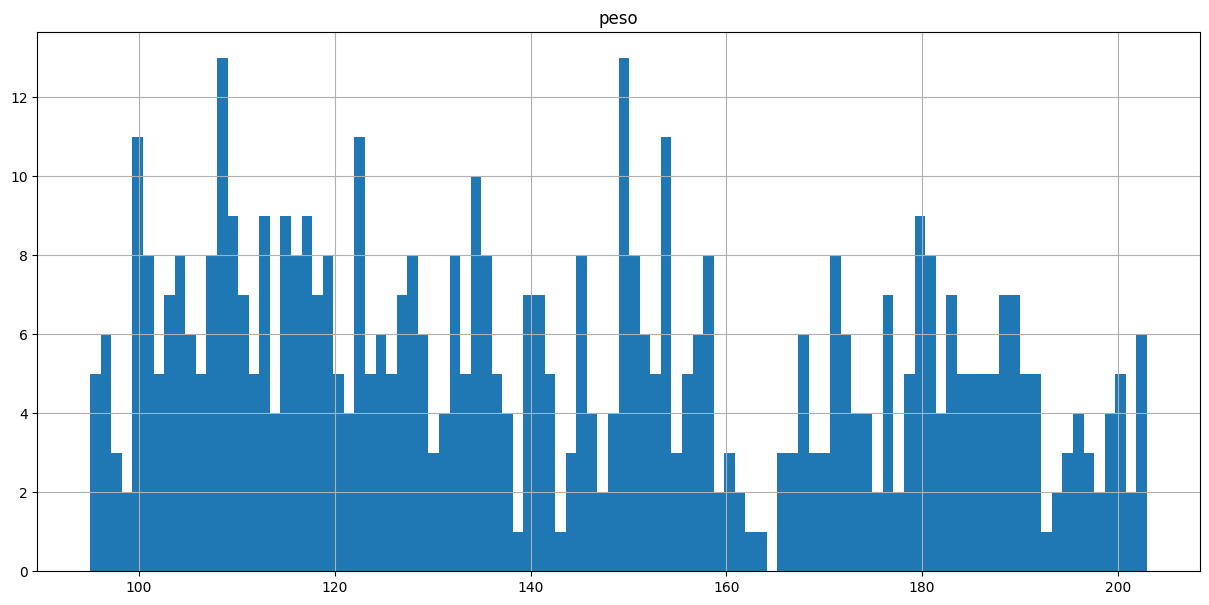

In [ ]:
clientes.hist(column='peso', figsize=(15,7), bins=100)

array([[<Axes: title={'center': 'colesterol'}>]], dtype=object)

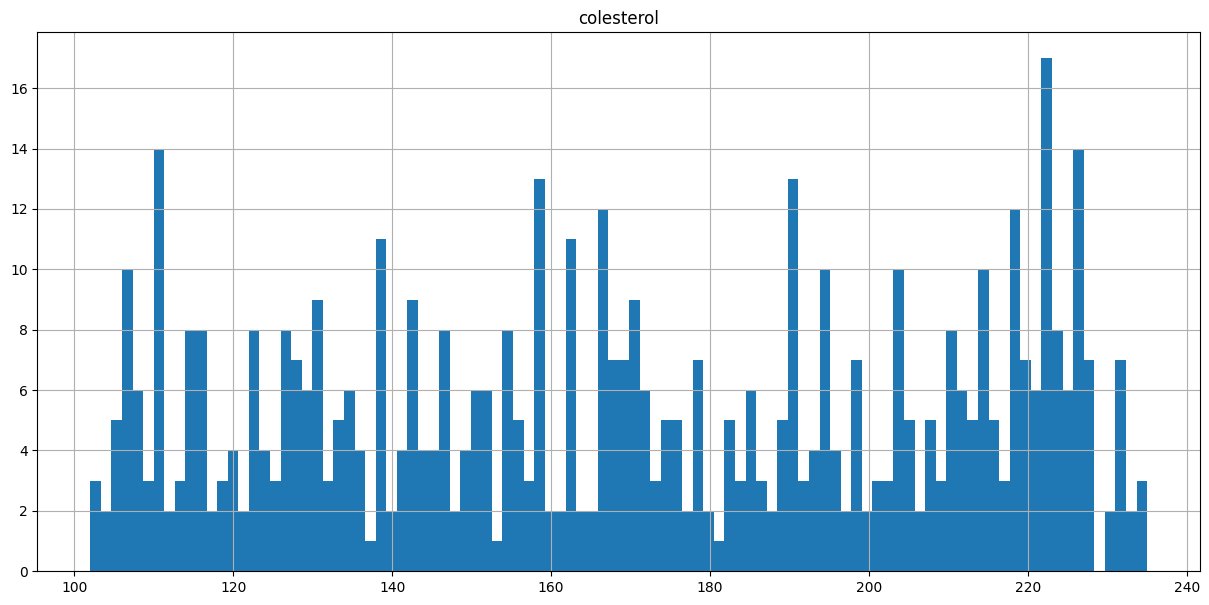

In [ ]:
clientes.hist(column='colesterol', figsize=(15,7), bins=100)

array([[<Axes: title={'center': 'idade'}>]], dtype=object)

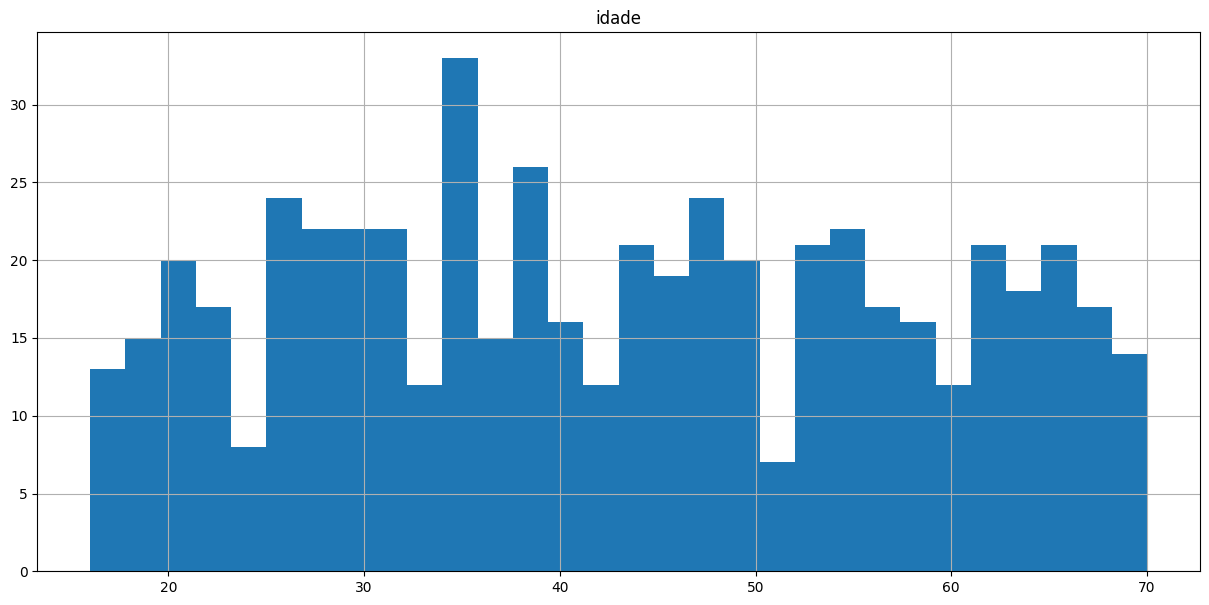

In [ ]:
idade.hist(column='idade', figsize=(15,7), bins=30
           )

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

In [ ]:
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado,genero_number
0,1,102.0,111,Masculino,23,1
1,2,115.0,135,Masculino,7,1
2,3,115.0,136,Masculino,4,1
3,4,140.0,167,Feminino,24,0
4,5,130.0,158,Masculino,26,1


array([[<Axes: title={'center': 'genero_number'}>]], dtype=object)

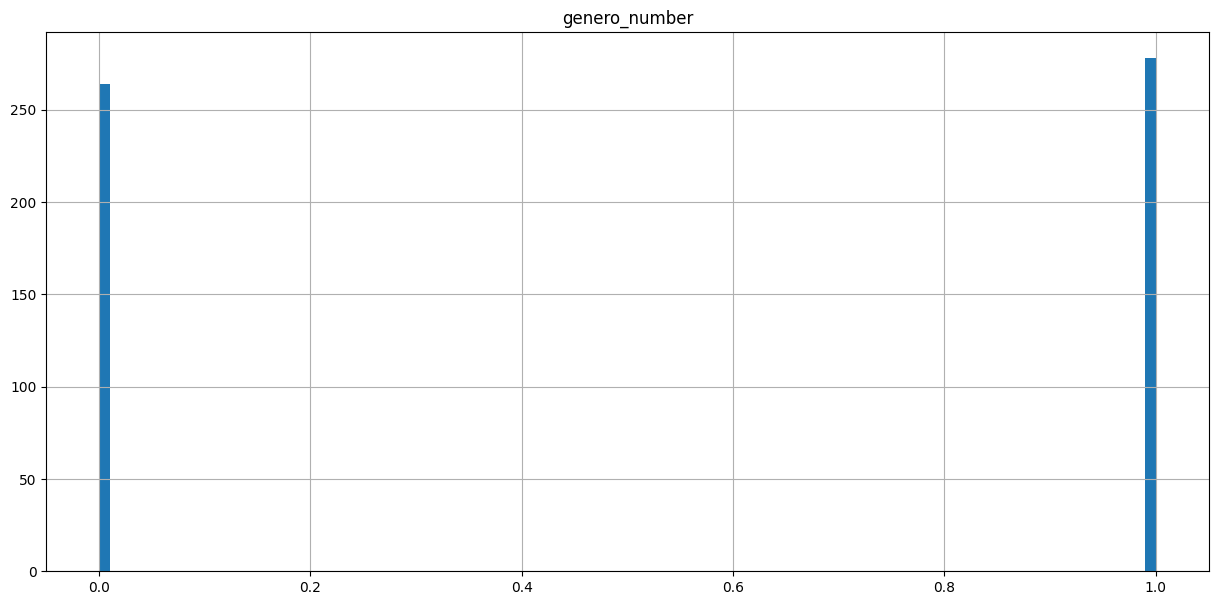

In [ ]:
clientes.hist(column='genero_number', figsize=(15,7), bins=100)

# Junçoes das tabelas

In [ ]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
64,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
85,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
439,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
474,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
176,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
393,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [ ]:
clientes_estados

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
1,54,149.0,183,Masculino,23,1,Roraima,rr,Brasil
2,61,113.0,129,Feminino,23,0,Roraima,rr,Brasil
3,154,134.0,162,Feminino,23,0,Roraima,rr,Brasil
4,164,133.0,155,Feminino,23,0,Roraima,rr,Brasil
...,...,...,...,...,...,...,...,...,...
537,456,134.0,168,Masculino,12,1,Mato Grosso do Sul,ms,Brasil
538,464,144.0,171,Feminino,12,0,Mato Grosso do Sul,ms,Brasil
539,492,142.0,172,Masculino,12,1,Mato Grosso do Sul,ms,Brasil
540,493,153.0,192,Masculino,12,1,Mato Grosso do Sul,ms,Brasil


In [ ]:
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [ ]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
85,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
439,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
474,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
176,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
393,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
537,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
538,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
539,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
540,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


# Organizando Base de Dados

In [ ]:
base_completa.rename(columns={'id_cliente':'cod_cliente','genero_number':'cod_genero'}, inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
64,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
85,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
439,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
474,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
176,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
393,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [ ]:
base_completa.sigla_estado.str.upper()

0      RR
17     DF
39     AM
64     SC
85     SE
       ..
439    RO
474    AC
176    CE
393    RN
121    ES
Name: sigla_estado, Length: 542, dtype: object

In [ ]:
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

In [ ]:
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,RR,Brasil,17
17,2,115.0,135,Masculino,7,1,Distrito Federal,DF,Brasil,28
39,3,115.0,136,Masculino,4,1,Amazonas,AM,Brasil,62
64,4,140.0,167,Feminino,24,0,Santa Catarina,SC,Brasil,55
85,5,130.0,158,Masculino,26,1,Sergipe,SE,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
439,543,172.0,207,Masculino,22,1,Rondônia,RO,Brasil,20
474,544,129.0,157,Masculino,1,1,Acre,AC,Brasil,66
176,545,107.0,115,Masculino,6,1,Ceará,CE,Brasil,36
393,546,117.0,147,Masculino,20,1,Rio Grande do Norte,RN,Brasil,57


In [ ]:
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']]

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
17,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
39,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
64,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
85,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
439,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
474,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
176,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
393,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


In [ ]:
base_completa = base_completa[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']].reset_index(drop=True)

In [ ]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil
...,...,...,...,...,...,...,...,...,...
537,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil
538,544,Masculino,66,129.0,157,1,Acre,AC,Brasil
539,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil
540,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil


# Analise Peso x Colesterol

## Analise dos Dados

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from pandas.core.common import random_state
def calcular_wcss(dados_cliente):
  wcss= []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X=dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss  

In [ ]:
dados_cliente = base_completa[['peso','colesterol']]
dados_cliente.head

<bound method NDFrame.head of       peso  colesterol
0    102.0         111
1    115.0         135
2    115.0         136
3    140.0         167
4    130.0         158
..     ...         ...
537  172.0         207
538  129.0         157
539  107.0         115
540  117.0         147
541  148.0         176

[542 rows x 2 columns]>

In [ ]:
wcss_clientes = calcular_wcss(dados_cliente)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [ ]:
type(wcss_clientes)

list

In [ ]:
for i in range(len(wcss_clientes)):
  print(f'O Cluester{i} possui valor de wcss de : {wcss_clientes[i]}')

O Cluester0 possui valor de wcss de : 1345138.9833948342
O Cluester1 possui valor de wcss de : 326459.1691111843
O Cluester2 possui valor de wcss de : 138699.50537699353
O Cluester3 possui valor de wcss de : 80254.74760725317
O Cluester4 possui valor de wcss de : 53143.6731986646
O Cluester5 possui valor de wcss de : 37069.16273806841
O Cluester6 possui valor de wcss de : 27332.97905571756
O Cluester7 possui valor de wcss de : 21793.599301067796
O Cluester8 possui valor de wcss de : 17000.359924745513
O Cluester9 possui valor de wcss de : 14486.135234960937


## Visualizar Grafico

In [ ]:
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go

In [ ]:
grafico_wcss = px.line( x= range(1,11),
                        y= wcss_clientes)

fig = go.Figure(grafico_wcss)

fig.update_layout(title='Calculando o WCSS',
                 xaxis_title= 'Número de clusters',
                 yaxis_title= 'Valor do Wcss',
                 template = 'plotly_white'       
                  )
fig.show()


In [ ]:
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,0
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,0
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,0
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,3
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,3
...,...,...,...,...,...,...,...,...,...,...
537,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,1
538,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,3
539,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,0
540,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,3


## Centroides Calcular

In [ ]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[107.80519481, 121.31818182],
       [185.02758621, 219.6137931 ],
       [154.85849057, 189.67924528],
       [130.64963504, 158.09489051]])

In [ ]:
grafico = px.scatter(x = base_completa['peso'],
                       y = base_completa['colesterol'],
                       color = base_completa['cluster'])



grafico_centroide = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7,7])
grafico_final_petala = go.Figure(data = grafico.data + grafico_centroide.data)
grafico_final_petala.show()




In [ ]:
grafico = px.scatter(x = base_completa['peso'],
                       y = base_completa['colesterol'],
                       color = base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title='Análise de Clusters',
                 xaxis_title= 'Colesterol',
                 yaxis_title= 'peso'       
                  )
fig.show()


In [ ]:
def plotar_grafico(x, y, xlabel, y_label):
  grafico = px.scatter(x = x,
                       y = y,
                       color=base_completa['cluster'])
  
  fig = go.Figure(grafico)

  fig.update_layout(title='Análise de Clusters',
                 xaxis_title= 'Colesterol',
                 yaxis_title= 'peso'       
                  )
  fig.show() 

In [ ]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], 'colesterol', 'peso')

In [ ]:
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

## Segmentando os Clientes

In [ ]:
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)

In [ ]:
cluster_clientes = base_completa

In [ ]:
cluster_clientes.loc[cluster_clientes['cluster']==3, 'nome_cluster'] = 'Risco Médio Alto'
cluster_clientes.loc[cluster_clientes['cluster']==2, 'nome_cluster'] = 'Risco Baixo'
cluster_clientes.loc[cluster_clientes['cluster']==1, 'nome_cluster'] = 'Risco MédioBaixo'
cluster_clientes.loc[cluster_clientes['cluster']==0, 'nome_cluster'] = 'Risco Alto'

In [ ]:
cluster_clientes

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,0,Risco Alto
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,0,Risco Alto
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,0,Risco Alto
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,3,Risco Médio Alto
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,3,Risco Médio Alto
...,...,...,...,...,...,...,...,...,...,...,...
537,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,1,Risco MédioBaixo
538,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,3,Risco Médio Alto
539,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,0,Risco Alto
540,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,3,Risco Médio Alto


## Analises de Clusters criados

In [ ]:
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Risco Alto,154.0,43.383117,15.399770,17.0,30.25,42.0,58.0,70.0
Risco Baixo,106.0,42.188679,15.787345,16.0,28.25,44.0,55.0,70.0
Risco Médio Alto,137.0,42.408759,14.586232,16.0,30.00,42.0,54.0,70.0
Risco MédioBaixo,145.0,42.848276,15.261303,16.0,31.00,42.0,56.0,69.0


In [ ]:
cluster_clientes.groupby('nome_cluster')['colesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Risco Alto,154.0,121.318182,11.200901,102.0,110.25,122.0,130.75,141.0
Risco Baixo,106.0,189.679245,8.898954,172.0,183.00,190.0,196.00,204.0
Risco Médio Alto,137.0,158.094891,9.556245,141.0,150.00,158.0,167.00,174.0
Risco MédioBaixo,145.0,219.613793,7.660492,204.0,214.00,220.0,225.00,235.0


In [ ]:
cluster_clientes.groupby('nome_cluster')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Risco Alto,154.0,107.805195,6.631355,95.0,102.0,108.0,113.0,120.0
Risco Baixo,106.0,154.858491,6.877761,141.0,150.0,154.0,158.0,170.0
Risco Médio Alto,137.0,130.649635,7.455349,116.0,125.0,131.0,136.0,145.0
Risco MédioBaixo,145.0,185.027586,9.361524,168.0,179.0,184.0,192.0,203.0


In [ ]:
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Risco Alto,154,27,Amazonas,11
Risco Baixo,106,27,Minas Gerais,7
Risco Médio Alto,137,27,Piauí,10
Risco MédioBaixo,145,27,Distrito Federal,9


In [ ]:
cluster_clientes.query('nome_cluster == "Risco ModeradoBaixo" & estado == "Mato Grosso"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster


In [ ]:
cluster_clientes.query('nome_cluster == "Risco MédioBaixo" & estado == "Brasilia"').count()

cod_cliente     0
genero          0
idade           0
peso            0
colesterol      0
id_estado       0
estado          0
sigla_estado    0
pais            0
cluster         0
nome_cluster    0
dtype: int64

In [ ]:
cluster_clientes.query('nome_cluster == "Risco Baixo" & genero == "Feminino"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
7,8,Feminino,30,145.0,176,25,São Paulo,SP,Brasil,2,Risco Baixo
13,14,Feminino,34,156.0,192,7,Distrito Federal,DF,Brasil,2,Risco Baixo
18,19,Feminino,48,152.0,189,17,Pernambuco,PE,Brasil,2,Risco Baixo
20,21,Feminino,70,153.0,189,5,Bahia,BA,Brasil,2,Risco Baixo
55,56,Feminino,25,164.0,197,4,Amazonas,AM,Brasil,2,Risco Baixo
56,57,Feminino,65,157.0,196,7,Distrito Federal,DF,Brasil,2,Risco Baixo
61,62,Feminino,47,150.0,185,8,Espírito Santo,ES,Brasil,2,Risco Baixo
72,74,Feminino,24,156.0,191,19,Rio de Janeiro,RJ,Brasil,2,Risco Baixo
89,91,Feminino,47,154.0,189,22,Rondônia,RO,Brasil,2,Risco Baixo
96,98,Feminino,25,149.0,185,1,Acre,AC,Brasil,2,Risco Baixo


In [ ]:
cluster_clientes.query('nome_cluster == "Risco Baixo" & genero == "Feminino"')


,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
7,8,Feminino,30,145.0,176,25,São Paulo,SP,Brasil,2,Risco Baixo
13,14,Feminino,34,156.0,192,7,Distrito Federal,DF,Brasil,2,Risco Baixo
18,19,Feminino,48,152.0,189,17,Pernambuco,PE,Brasil,2,Risco Baixo
20,21,Feminino,70,153.0,189,5,Bahia,BA,Brasil,2,Risco Baixo
55,56,Feminino,25,164.0,197,4,Amazonas,AM,Brasil,2,Risco Baixo
56,57,Feminino,65,157.0,196,7,Distrito Federal,DF,Brasil,2,Risco Baixo
61,62,Feminino,47,150.0,185,8,Espírito Santo,ES,Brasil,2,Risco Baixo
72,74,Feminino,24,156.0,191,19,Rio de Janeiro,RJ,Brasil,2,Risco Baixo
89,91,Feminino,47,154.0,189,22,Rondônia,RO,Brasil,2,Risco Baixo
96,98,Feminino,25,149.0,185,1,Acre,AC,Brasil,2,Risco Baixo


In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['colesterol'].describe()

count        mean        std    min     25%  \
nome_cluster     genero                                                   
Risco Alto       Feminino    68.0  123.235294  10.703769  102.0  115.00   
                 Masculino   86.0  119.802326  11.412913  102.0  110.00   
Risco Baixo      Feminino    53.0  190.452830   7.919222  173.0  186.00   
                 Masculino   53.0  188.905660   9.796515  172.0  180.00   
Risco Médio Alto Feminino    82.0  160.000000   9.573626  141.0  152.00   
                 Masculino   55.0  155.254545   8.876140  142.0  146.50   
Risco MédioBaixo Feminino    61.0  221.000000   6.080022  208.0  217.00   
                 Masculino   84.0  218.607143   8.523558  204.0  211.75   

                              50%     75%    max  
nome_cluster     genero                           
Risco Alto       Feminino   125.0  131.25  141.0  
                 Masculino  116.0  129.75  141.0  
Risco Baixo      Feminino   191.0  196.00  204.0  
                 Masculino  188.0  199.00  204.0  
Risco Médio Alto Feminino   162.0  168.75  174.0  
                 Masculino  156.0  162.00  173.0  
Risco MédioBaixo Feminino   221.0  225.00  235.0  
                 Masculino  219.0  225.25  235.0

In [ ]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe()

count        mean        std    min     25%  \
nome_cluster     genero                                                   
Risco Alto       Feminino    68.0  108.705882   6.471658   96.0  104.00   
                 Masculino   86.0  107.093023   6.706674   95.0  102.00   
Risco Baixo      Feminino    53.0  154.811321   6.177056  141.0  151.00   
                 Masculino   53.0  154.905660   7.573395  145.0  150.00   
Risco Médio Alto Feminino    82.0  132.378049   7.590833  116.0  126.25   
                 Masculino   55.0  128.072727   6.500298  117.0  123.00   
Risco MédioBaixo Feminino    61.0  186.278689   7.633547  170.0  181.00   
                 Masculino   84.0  184.119048  10.389296  168.0  174.75   

                              50%     75%    max  
nome_cluster     genero                           
Risco Alto       Feminino   110.0  113.00  118.0  
                 Masculino  106.0  113.00  120.0  
Risco Baixo      Feminino   156.0  158.00  169.0  
                 Masculino  152.0  160.00  170.0  
Risco Médio Alto Feminino   133.0  138.75  145.0  
                 Masculino  128.0  133.00  144.0  
Risco MédioBaixo Feminino   186.0  192.00  203.0  
                 Masculino  183.0  191.25  203.0

# Analise Idade x Colesterol

## Preparando tabela

In [ ]:
dados_cliente_idade = base_completa[['idade','colesterol']]
dados_cliente_idade.head

<bound method NDFrame.head of      idade  colesterol
0       17         111
1       28         135
2       62         136
3       55         167
4       44         158
..     ...         ...
537     20         207
538     66         157
539     36         115
540     57         147
541     61         176

[542 rows x 2 columns]>

## Definindo numero de Clusters

In [ ]:
wcss_clientes_idade = calcular_wcss(dados_cliente_idade)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change fro

In [ ]:
grafico_wcss_idade = px.line( x= range(1,11),
                        y= wcss_clientes_idade)

fig = go.Figure(grafico_wcss_idade)

fig.update_layout(title='Calculando o WCSS',
                 xaxis_title= 'Número de clusters',
                 yaxis_title= 'Valor do Wcss',
                 template = 'plotly_white'       
                  )
fig.show()


In [ ]:
base_completa

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,nome_cluster
0,1,Masculino,17,102.0,111,23,Roraima,RR,Brasil,0,Risco Alto
1,2,Masculino,28,115.0,135,7,Distrito Federal,DF,Brasil,0,Risco Alto
2,3,Masculino,62,115.0,136,4,Amazonas,AM,Brasil,0,Risco Alto
3,4,Feminino,55,140.0,167,24,Santa Catarina,SC,Brasil,2,Risco Médio Alto
4,5,Masculino,44,130.0,158,26,Sergipe,SE,Brasil,2,Risco Médio Alto
...,...,...,...,...,...,...,...,...,...,...,...
537,543,Masculino,20,172.0,207,22,Rondônia,RO,Brasil,1,Risco MédioBaixo
538,544,Masculino,66,129.0,157,1,Acre,AC,Brasil,2,Risco Médio Alto
539,545,Masculino,36,107.0,115,6,Ceará,CE,Brasil,0,Risco Alto
540,546,Masculino,57,117.0,147,20,Rio Grande do Norte,RN,Brasil,0,Risco Médio Alto


Treinando Algoritimo K-Means

In [ ]:
kmeans_clientes = KMeans(n_clusters=3, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



## Encontando Centroides

In [ ]:
centroides_clusters_idade = kmeans_clientes.cluster_centers_
centroides_clusters_idade

array([[110.4       , 125.88947368],
       [182.18934911, 217.        ],
       [141.96174863, 173.22404372]])

## Visualizar **Gráfico**

In [ ]:
grafico = px.scatter(x = base_completa['idade'],
                       y = base_completa['colesterol'],
                       color = base_completa['cluster'])
fig = go.Figure(grafico)

fig.update_layout(title='Análise de Clusters',
                 xaxis_title= 'idade',
                 yaxis_title= 'colesterol'       
                  )
fig.show()